In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ServiceTrain.csv")
df

,OilQual,EnginePerf,NormMileage,TyreWear,HVACwear,Service
0,103.388821,103.504032,103.051485,106.172658,105.6868429,No
1,26.765516,26.188265,31.259536,29.186162,31.31127506,Yes
2,62.413282,63.681061,59.720883,64.704031,58.62051752,Yes
3,45.533338,49.906615,48.777581,48.113851,?,No
4,104.388821,103.284032,103.051485,105.822658,106.5368429,No
...,...,...,...,...,...,...
312,104.388821,105.744032,103.051485,105.782658,104.1968429,No
313,63.823282,62.741061,59.720883,61.654031,62.62051752,Yes
314,26.535516,27.418265,31.259536,27.486162,33.31127506,Yes
315,26.215516,26.338265,31.259536,27.036162,31.31127506,Yes


In [2]:
df.isna().sum()

OilQual        0
EnginePerf     1
NormMileage    2
TyreWear       2
HVACwear       1
Service        0
dtype: int64

In [3]:
df.dtypes

OilQual        float64
EnginePerf     float64
NormMileage    float64
TyreWear       float64
HVACwear        object
Service         object
dtype: object

...DATA PRE-PROCESSING...

In [4]:
df=df.replace('?',np.NaN)
df.isna().sum()

OilQual        0
EnginePerf     1
NormMileage    2
TyreWear       2
HVACwear       2
Service        0
dtype: int64

In [5]:
avg1 = df["EnginePerf"].astype('float').mean()
avg2 = df["NormMileage"].astype('float').mean()
avg3 = df["TyreWear"].astype('float').mean()
mode = df["HVACwear"].astype('str').mode()
df['EnginePerf'].replace(np.NaN,avg1,inplace=True)
df['NormMileage'].replace(np.NaN,avg2,inplace=True)
df['TyreWear'].replace(np.NaN,avg3,inplace=True)
df['HVACwear'].replace(np.NaN,mode.iloc[0],inplace=True)

In [6]:
df.isna().sum()

OilQual        0
EnginePerf     0
NormMileage    0
TyreWear       0
HVACwear       0
Service        0
dtype: int64

...DETECTING OUTLIERS...

<AxesSubplot:xlabel='OilQual', ylabel='EnginePerf'>

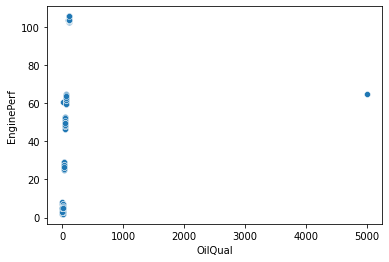

In [7]:
sns.scatterplot(x=df['OilQual'],y=df['EnginePerf'])

In [8]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5*IQR)
    upper_range= Q3+(1.5*IQR)
    return lower_range, upper_range

In [9]:
lowoilqual,upperoilqual=remove_outlier(df['OilQual'])
df['OilQual']=np.where(df['OilQual']>upperoilqual,upperoilqual,df['OilQual'])
df['OilQual']=np.where(df['OilQual']<lowoilqual,lowoilqual,df['OilQual'])

...ENCODING AND APPLYING REGRESSION MODEL...

In [10]:
Enc_Service = []
for i in df["Service"]:
    if(i=="Yes"):
        Enc_Service.append(1)
    elif(i=="No"):
        Enc_Service.append(0)
df["Encoded Service"] = Enc_Service
df = df.drop(['Service'],axis=1)

In [11]:
from sklearn import linear_model

X = df[['OilQual', 'EnginePerf', 'NormMileage', 'TyreWear', 'HVACwear']]
Y = df['Encoded Service']

regr = linear_model.LogisticRegression()
regr.fit(X, Y)
print(regr.coef_)

[[ 0.29982612 -0.22476411 -0.04665779 -0.18238537  0.12922071]]


In [12]:
df

,OilQual,EnginePerf,NormMileage,TyreWear,HVACwear,Encoded Service
0,103.388821,103.504032,103.051485,106.172658,105.6868429,0
1,26.765516,26.188265,31.259536,29.186162,31.31127506,1
2,62.413282,63.681061,59.720883,64.704031,58.62051752,1
3,45.533338,49.906615,48.777581,48.113851,105.5368429,0
4,104.388821,103.284032,103.051485,105.822658,106.5368429,0
...,...,...,...,...,...,...
312,104.388821,105.744032,103.051485,105.782658,104.1968429,0
313,63.823282,62.741061,59.720883,61.654031,62.62051752,1
314,26.535516,27.418265,31.259536,27.486162,33.31127506,1
315,26.215516,26.338265,31.259536,27.036162,31.31127506,1


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.95, random_state=10)
reg = linear_model.LogisticRegression()
reg.fit(x_train, y_train)
accu = reg.score(x_test,y_test)
print("Model Accuracy = ",accu)

pred = regr.predict([[26.76, 26.18, 31.25, 29.18, 31.31]])
print(pred)

Model Accuracy =  0.8940397350993378
[1]


C:\Users\admin\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
